# movielens analysis

In [2]:
#first step to check the modules are imported or not 
# if not import modules by giving this command pip install module name

In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
data = pd.read_csv("movies.csv")

In [6]:
print(data.shape) # which gives data info rows * coloumns

(27278, 3)


In [7]:
data.head() #first five data of csv file (default)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
data.head(10) #first 10 data of csv file 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [9]:
data.tail() # last 5 data from csv file (default)

,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [10]:
data.tail(10) #last 10 data from csv file 

,movieId,title,genres
27268,131241,Ants in the Pants (2000),Comedy|Romance
27269,131243,Werner - Gekotzt wird später (2003),Animation|Comedy
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy
27271,131250,No More School (2000),Comedy
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [13]:
data.info() # info provides complete information of file like no.of columns ,rows type of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [18]:
data.count()

movieId    27278
title      27278
genres     27278
dtype: int64

In [20]:
r_data = pd.read_csv('ratings.csv')
r_data

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [22]:
r_data.shape  

(1048575, 4)

In [23]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieId    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


In [25]:
r_data.describe()


,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [27]:
r_data['rating'].min()  # minimum rating

0.5

In [28]:
r_data['rating'].max() #maximum rating

5.0

In [30]:
t_data = pd.read_csv("tags.csv")
t_data

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


In [31]:
t_data.shape

(465564, 4)

In [32]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 14.2+ MB


In [33]:
t_data.describe()

,userId,movieId,timestamp
count,465564.000000,465564.000000,4.655640e+05
mean,68712.354263,32627.762920,1.298711e+09
std,41877.674053,36080.241157,7.920891e+07
min,18.000000,1.000000,1.135429e+09
25%,28780.000000,2571.000000,1.245007e+09
50%,70201.000000,7373.000000,1.302291e+09
75%,107322.000000,62235.000000,1.366218e+09
max,138472.000000,131258.000000,1.427771e+09


In [35]:
l_data = pd.read_csv('links.csv')
l_data

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


In [36]:
l_data.shape

(27278, 3)

In [38]:
l_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


# cleaning the data 

In [44]:
#checking is any null values there in movies.csv

data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [46]:
#checking is any null values there in rating.csv
r_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [52]:
#checking is any null values there in links.csv
n = l_data.shape
print(n)
l_data.isnull().any()


(27278, 3)


movieId    False
imdbId     False
tmdbId      True
dtype: bool

In [61]:
#checking is any null values there in tags.csv
t = t_data.shape
print(t)
t_data.isnull().any()

(465548, 4)


userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [62]:
# here we found null values in links.csv and tags.csv
# to remove the data
l_data = l_data.dropna()  # here null data is removed
print('after removing null values :',l_data.shape) 

after removing null values : (27026, 3)


In [63]:
print('before removing null values : ',(t_data.shape)) #before removing the null values
t_data = t_data.dropna()
print('after removing null values : ',(t_data.shape)) #after removing the null values

before removing null values :  (465548, 4)
after removing null values :  (465548, 4)


In [67]:
#unique tags in tags.csv
uni = t_data['tag'].unique()
print(len(uni))

38643


In [92]:
#filtering to list of all comedy movies from csv file
mo = data[data['genres'].str.contains('Comedy')]
print("total comedy movies are :",len(mo))
mo.head()


total comedy movies are : 8374


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [95]:
tag_search = t_data['tag'].str.contains('dark')
t_data[tag_search].head()

,userId,movieId,tag,timestamp
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
4,65,592,dark hero,1368150078
21,65,6874,dark hero,1368150079
51,121,778,dark comedy,1300852846


In [103]:
r_data.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [105]:
# now we are removing timstamp column from ratings.csv file
# del r_data['timestamp']

In [107]:
#merging two dataframes or two files "movies.csv" and "ratings.csv"

merge = data.merge(r_data, on = 'movieId', how = 'inner')
merge.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


In [111]:
#display high rated movies

high_rated = merge['rating'] > 4.0
merge[high_rated].head(10)

,movieId,title,genres,userId,rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0


In [113]:
#display low rated movies

high_rated = merge['rating'] < 2.0
merge[high_rated].head(10)

,movieId,title,genres,userId,rating
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
36,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,115,1.5
89,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,269,1.0
90,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,271,1.5
168,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,514,1.0
266,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,763,1.0
306,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,858,1.5
430,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1247,1.0
472,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1374,1.5
474,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1377,1.5


In [115]:
#total number of unique movie genre
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

1342

In [121]:
#top 25 most rated movies
movie_ratings = data.groupby('title').size()

# Sort the movies by the number of ratings in descending order and get the top 25
most_rated = movie_ratings.sort_values(ascending=False).head(25)

# Display the top 25 most rated movies
print(most_rated)

title
Darling (2007)                                               2
Hamlet (2000)                                                2
Chaos (2005)                                                 2
Men with Guns (1997)                                         2
Girl, The (2012)                                             2
Aladdin (1992)                                               2
Casanova (2005)                                              2
Clear History (2013)                                         2
Beneath (2013)                                               2
Paradise (2013)                                              2
20,000 Leagues Under the Sea (1997)                          2
Offside (2006)                                               2
Johnny Express (2014)                                        2
War of the Worlds (2005)                                     2
Blackout (2007)                                              2
Emma (1996)                                      

In [134]:
#slicing the columns to display data

data[['title','genres']].head(10)



,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
5,Heat (1995),Action|Crime|Thriller
6,Sabrina (1995),Comedy|Romance
7,Tom and Huck (1995),Adventure|Children
8,Sudden Death (1995),Action
9,GoldenEye (1995),Action|Adventure|Thriller


In [136]:
# here we extract year from title
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [138]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
                
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count



In [140]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [142]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

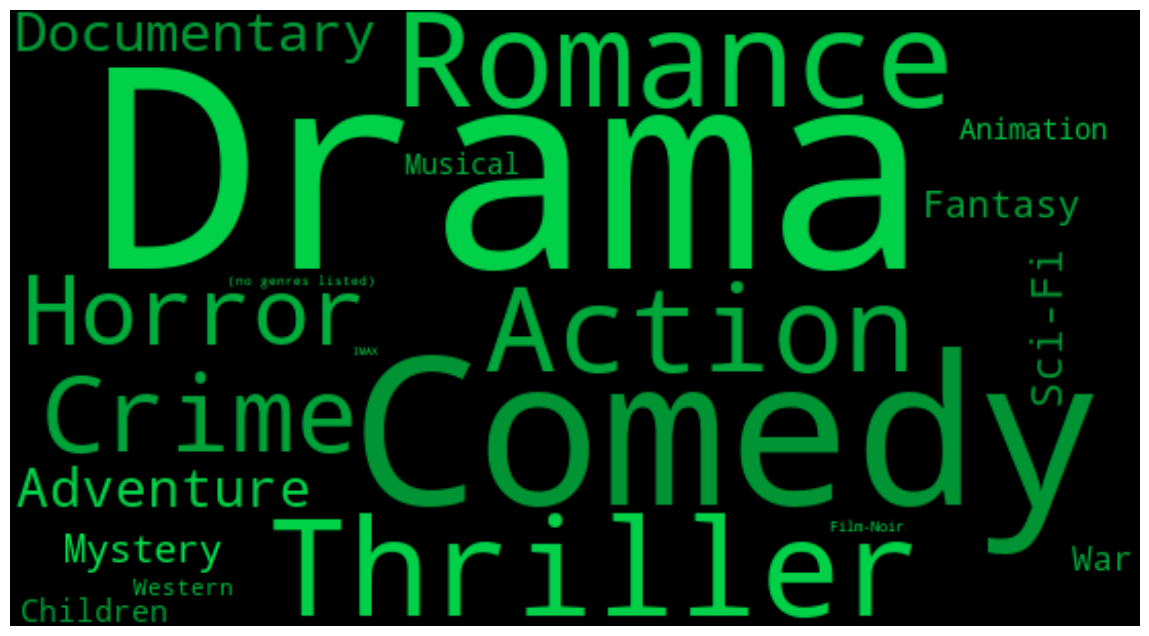

In [144]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(16, 8))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

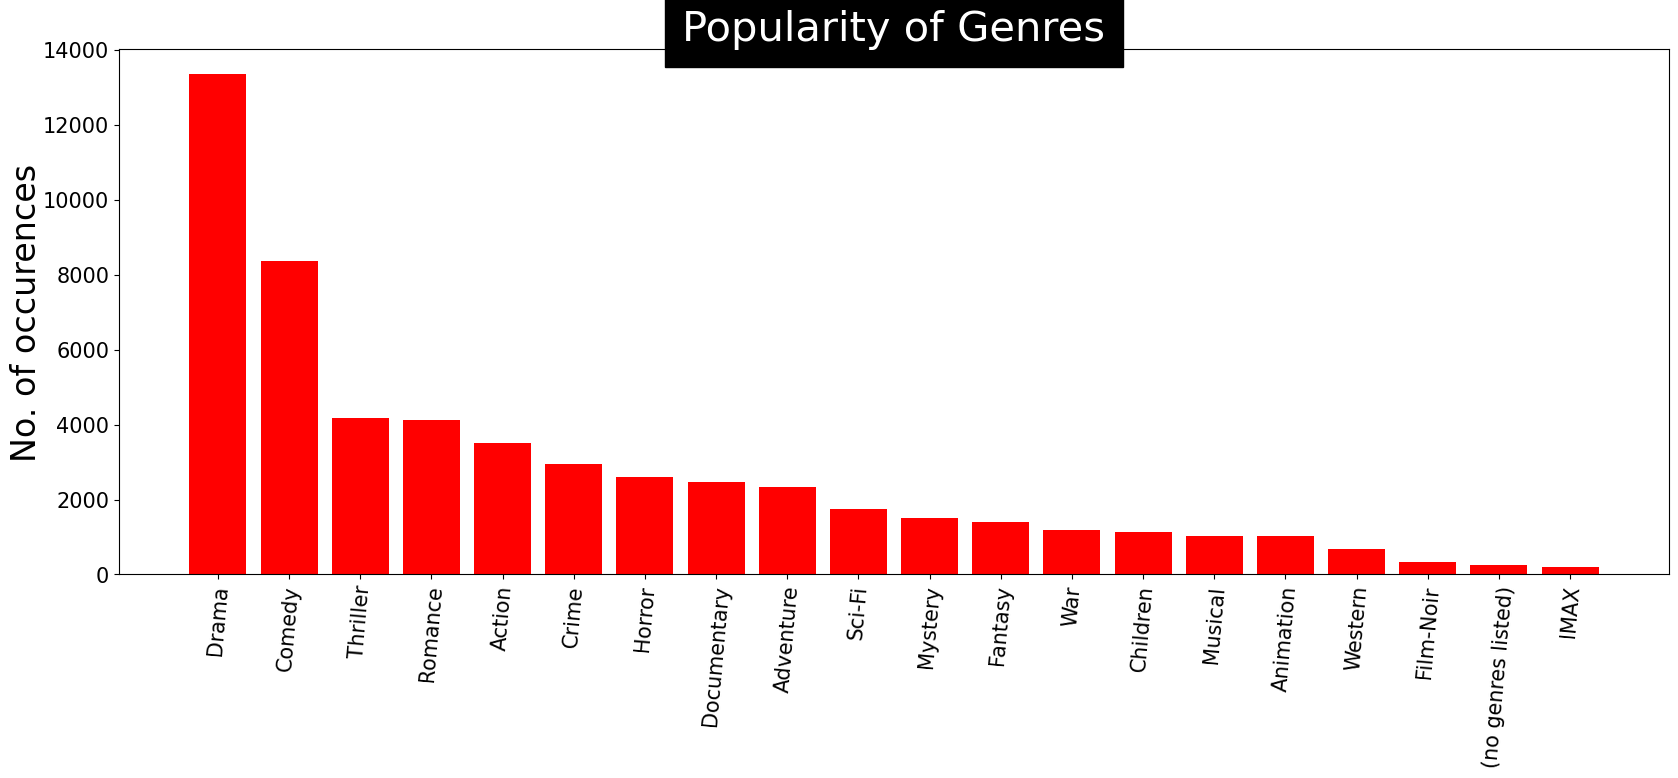

In [146]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(20,15))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()